<a href="https://colab.research.google.com/github/devinbelden/capstone-project/blob/master/Modeling_Using_Bounding_Boxes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Detecto to Create Bounding Boxes

This isn't nearly finished, but it's a demonstration of using the [Detecto](https://detecto.readthedocs.io/en/latest/index.html) package for computer vision. Detecto is built on top of PyTorch, and uses one of the models found in PyTorch's model zoo. Namely, it uses [Faster R-CNN ResNet-50 FPN](https://pytorch.org/docs/stable/torchvision/models.html#object-detection-instance-segmentation-and-person-keypoint-detection) to output class and bounding box predictions. 

I'll be adding more markdown as the days go by to explain exactly what I'm doing here, but the process is the same as it was in the initial modeling notebook: Create or otherwise obtain a model, train it on the same set of pictures as last time, and run predictions on the same set of test images as well. Small alterations (smallterations?) to our workflow include keeping the duplicate annotations (as this model is capable of generating multiple predictions per image), and converting the Street View screenshots in a slightly different way. Beyond that, the differences aren't exactly Legion. 

Note: I've also used a slightly different conversion method for generating the training data, per Detecto's needs. The zip file can be found [here](https://drive.google.com/file/d/1ZL6Dy8WqA-vV23_6R5MHyXm4lcEqYE5R/view?usp=sharing). The code for the data sorting and conversion of annotation data will be uploaded into a separate notebook at a later date.

In [1]:
from google.colab import drive
drive.mount('/gdrive',force_remount=True)
%cd ~
%cd ..

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/root
/


In [2]:
import os,glob

print(os.path.abspath(os.curdir))

# change the next line of code to reflect the location of the zip file in your own Drive
source_folder = r'/gdrive/My Drive/Datasets/' 
file = glob.glob(source_folder+'*.zip',recursive=True)[1]
file

/


'/gdrive/My Drive/Datasets/resized_detecto.zip'

In [0]:
zip_path = file

!cp "{zip_path}" .

!unzip -q resized_detecto.zip 
!rm resized_detecto.zip 

In [4]:
print(os.path.abspath(os.curdir))
os.listdir()

/


['sbin',
 'proc',
 'usr',
 'media',
 'bin',
 'run',
 'dev',
 'etc',
 'boot',
 'srv',
 'mnt',
 'home',
 'var',
 'lib64',
 'root',
 'opt',
 'sys',
 'tmp',
 'lib',
 'gdrive',
 'resized_detecto',
 '.dockerenv',
 'datalab',
 'tools',
 'swift',
 'content',
 'dlib-19.18.0-cp27-cp27mu-linux_x86_64.whl',
 'tensorflow-1.15.2',
 'dlib-19.18.0-cp36-cp36m-linux_x86_64.whl',
 'lib32']

In [5]:
!pip install detecto

In [0]:
import torch
import torchvision
import matplotlib.pyplot as plt

from torchvision import transforms
from detecto import core, utils, visualize

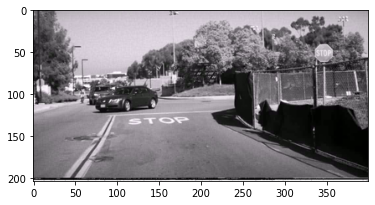

In [7]:
image = utils.read_image('resized_detecto/images/0.png')
plt.imshow(image)
plt.show()

In [8]:
import pandas as pd

train = pd.read_csv('resized_detecto/train_labels.csv')
train.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,0.png,400,204,stop,337,41,358,62
1,1.png,400,204,stop,360,34,384,58
2,10.png,400,204,speedLimit25,200,75,207,83
3,100.png,400,204,pedestrianCrossing,14,63,23,72
4,1000.png,400,204,stop,189,80,195,86


In [0]:
transform_img = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(800),
    transforms.ToTensor(),
    utils.normalize_transform(),
])

dataset = core.Dataset('resized_detecto/train_labels.csv', 
                       'resized_detecto/images/', 
                       transform=transform_img)

In [10]:
len(dataset)

4482

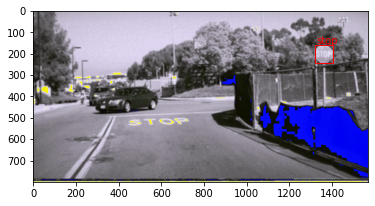

In [28]:
image, target = dataset[0]

visualize.show_labeled_image(image, target['boxes'], target['labels'])

In [29]:
image

tensor([[[0.2624, 0.2624, 0.1768,  ..., 0.5878, 0.5878, 0.5878],
         [0.2624, 0.2624, 0.1768,  ..., 0.5878, 0.5878, 0.5878],
         [0.2624, 0.2624, 0.1768,  ..., 0.5878, 0.5878, 0.5878],
         ...,
         [1.7523, 1.7523, 1.7523,  ..., 1.0502, 0.9646, 0.9646],
         [2.2489, 2.2489, 2.2489,  ..., 1.1187, 1.0159, 1.0159],
         [2.2489, 2.2489, 2.2489,  ..., 1.1187, 1.0159, 1.0159]],

        [[0.3452, 0.3452, 0.2577,  ..., 0.6254, 0.6254, 0.6254],
         [0.3452, 0.3452, 0.2577,  ..., 0.6254, 0.6254, 0.6254],
         [0.3452, 0.3452, 0.2577,  ..., 0.6254, 0.6254, 0.6254],
         ...,
         [1.9209, 1.9209, 1.9034,  ..., 1.1681, 1.0805, 1.0805],
         [2.4286, 2.4286, 2.4111,  ..., 1.2381, 1.1331, 1.1331],
         [2.4286, 2.4286, 2.4111,  ..., 1.2381, 1.1331, 1.1331]],

        [[0.6356, 0.6356, 0.5485,  ..., 0.9668, 0.9668, 0.9668],
         [0.6356, 0.6356, 0.5485,  ..., 0.9668, 0.9668, 0.9668],
         [0.6356, 0.6356, 0.5485,  ..., 0.9668, 0.9668, 0.

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth



Epoch 1 of 10
Loss: 0.4501037947020604
Epoch 2 of 10
Loss: 0.33570834630074264
Epoch 3 of 10
Loss: 0.33156499260113087
Epoch 4 of 10
Loss: 0.24702947781523849
Epoch 5 of 10
Loss: 0.2331661799314858
Epoch 6 of 10
Loss: 0.22408341193745324
Epoch 7 of 10
Loss: 0.22238834050752349
Epoch 8 of 10
Loss: 0.2204444257629309
Epoch 9 of 10
Loss: 0.22061017541001723
Epoch 10 of 10
Loss: 0.21993468119565523


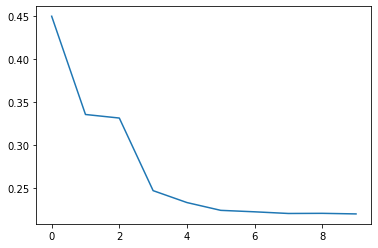

In [0]:
val_dataset = core.Dataset('resized_detecto/val_labels.csv', 
                           'resized_detecto/images/')

loader = core.DataLoader(dataset, batch_size=2, shuffle=True)

model = core.Model(['stop', 
                    'speedLimit25',
                    'speedLimit35',
                    'pedestrianCrossing',
                    'signalAhead'])

losses = model.fit(loader, val_dataset, epochs=10, verbose=True)

plt.plot(losses)
plt.show()

In [0]:
type(model)

detecto.core.Model

In [0]:
type(losses)

list

In [0]:
model.save('/gdrive/My Drive/Datasets/models/detecto_models/detecto_0.pth')

In [23]:
val_dataset[0]

(tensor([[[ 0.4166,  0.4166,  0.3994,  ...,  0.5536,  0.5193,  0.4851],
          [ 0.4337,  0.4337,  0.4166,  ...,  0.4851,  0.4851,  0.4851],
          [ 0.4679,  0.4679,  0.4508,  ...,  0.5022,  0.5022,  0.5022],
          ...,
          [-1.6213, -1.2274, -1.4329,  ..., -1.8439, -2.1008, -2.1179],
          [-1.3130, -1.2617, -1.3644,  ...,  0.2796,  0.4508,  0.6221],
          [ 2.2489,  2.2489,  2.2147,  ...,  2.2489,  1.7180,  0.9817]],
 
         [[ 0.4503,  0.4503,  0.4328,  ...,  0.5903,  0.5553,  0.5203],
          [ 0.4678,  0.4678,  0.4503,  ...,  0.5203,  0.5203,  0.5203],
          [ 0.5028,  0.5028,  0.4853,  ...,  0.5378,  0.5378,  0.5378],
          ...,
          [-1.5630, -1.1604, -1.3704,  ..., -1.7906, -2.0357, -2.0357],
          [-1.2479, -1.1779, -1.3004,  ...,  0.3803,  0.5553,  0.7304],
          [ 2.4286,  2.4286,  2.3410,  ...,  2.4286,  1.8508,  1.0980]],
 
         [[ 0.7925,  0.7925,  0.7751,  ...,  0.9319,  0.8971,  0.8622],
          [ 0.8099,  0.8099,

In [16]:
model = core.Model.load('/gdrive/My Drive/Datasets/models/detecto_models/detecto_0.pth',
                        ['stop', 
                         'speedLimit25',
                         'speedLimit35',
                         'pedestrianCrossing',
                         'signalAhead'])

val_dataset = core.Dataset('resized_detecto/val_labels.csv', 
                           'resized_detecto/images/')

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


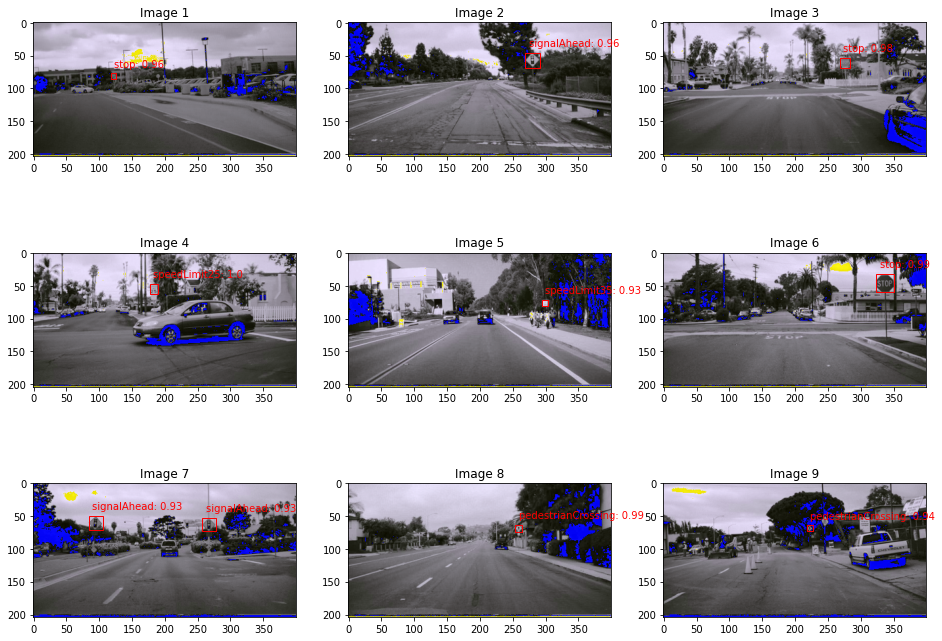

In [22]:
images = []
# Create a list of images 0, 5, 10, ... 40 from val_dataset
for i in range(0, 45, 5):
    image, _ = val_dataset[i]
    images.append(image)

# Plot a 3x3 grid of the model's predictions on our 9 images
visualize.plot_prediction_grid(model, images, dim=(3, 3), figsize=(16, 12))

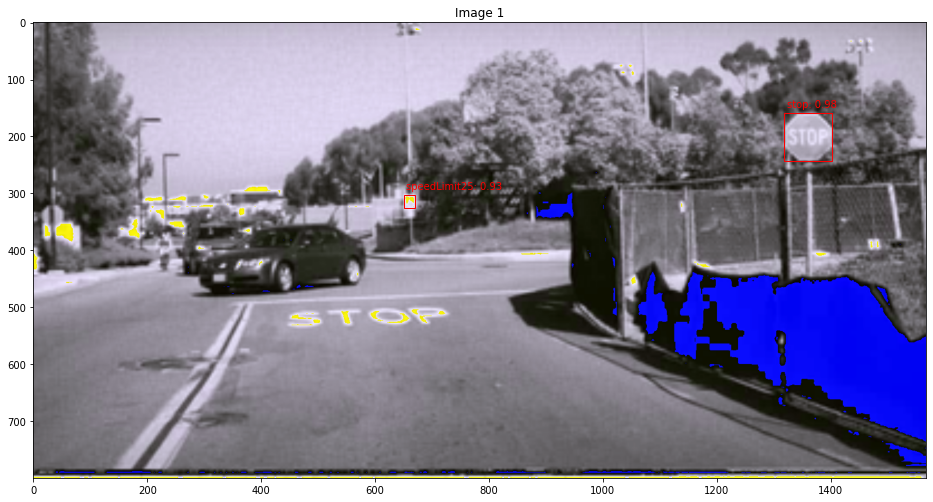

In [30]:
visualize.plot_prediction_grid(model, [image], figsize=(16,12))

In [31]:
file = glob.glob(source_folder+'*.zip',recursive=True)[0]
file

'/gdrive/My Drive/Datasets/LISA_dataset.zip'

In [0]:
zip_path = file

!cp "{zip_path}" .

!unzip -q LISA_dataset.zip 
!rm LISA_dataset.zip 

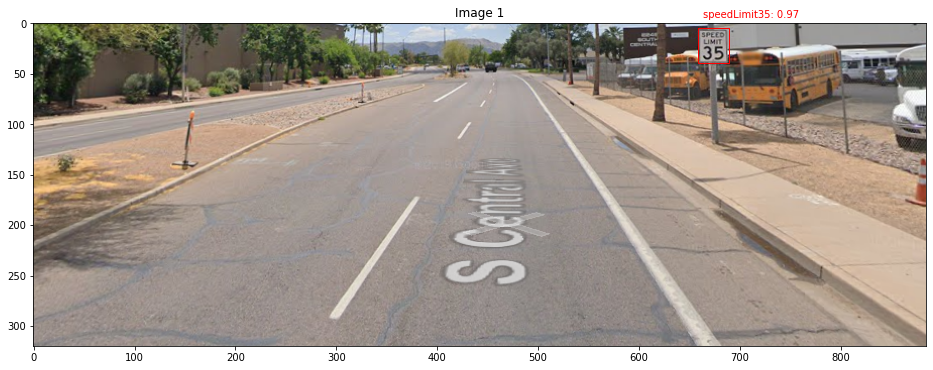

In [51]:
from PIL import Image

#test_image = utils.read_image('/prediction_images/prediction/pedestrianCrossing/pedCross0.PNG')

test_image = Image.open('/prediction_images/prediction/speedLimit35/35-10.PNG')
test_image_converted = test_image.convert('RGB')

visualize.plot_prediction_grid(model, [test_image_converted], figsize=(16,12))